In [1]:
from hgraph import const, emit, TS, from_table, MIN_DT
from hgraph.notebook import *

In [2]:
start_wiring_graph("test")

In [3]:
c = const("Hello World")

In [4]:
c.eval()

[(datetime.datetime(1970, 1, 1, 0, 0, 0, 1), 'Hello World')]

In [5]:
from hgraph import debug_print
debug_print("Message", c)

In [6]:
notebook_evaluate_graph()

[1970-01-01 00:00:00.000094][1970-01-01 00:00:00.000001] Message: Hello World


[1970-01-01 00:00:00.000166][1970-01-01 00:00:00.000001] Message: Hello World


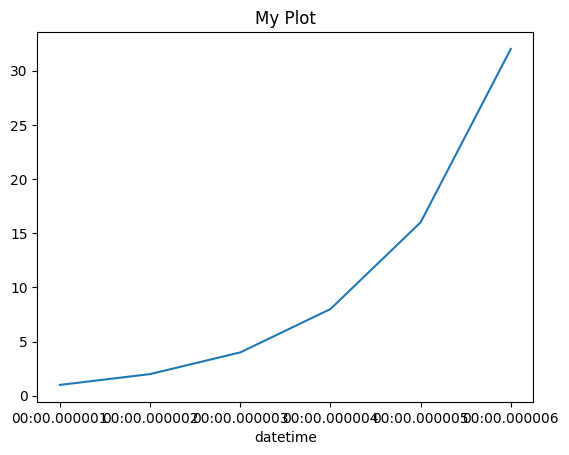

In [7]:
c = const((1, 2, 4, 8, 16, 32), TS[tuple[int, ...]])
t = emit(c)
t.plot(title="My Plot")

[1970-01-01 00:00:00.000179][1970-01-01 00:00:00.000001] Message: Hello World


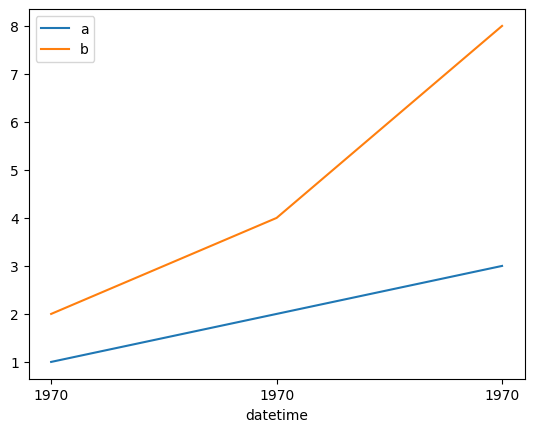

In [8]:
import polars as pl
from hgraph.adaptors.data_frame import PolarsDataFrameSource, tsb_from_data_source
from hgraph import MIN_ST,MIN_TD

class MyDataFrameSource(PolarsDataFrameSource):
    
    def __init__(self):
        super().__init__(
            pl.DataFrame(
                {
                    "date": [MIN_ST, MIN_ST+MIN_TD, MIN_ST+2*MIN_TD],
                    "a": [1.0, 2.0, 3.0],
                    "b": [2.0, 4.0, 8.0]
                }
            )
        )
    
t = tsb_from_data_source(MyDataFrameSource, 'date')
t.plot()